In [2]:
import cv2 as cv
import random
import numpy as np
import sklearn as sk
import math
from matplotlib import pyplot as plt

In [3]:
def canny(x):
    T1 = cv.getTrackbarPos("T1", "Canny")
    T2 = cv.getTrackbarPos("T2", "Canny")
    resC = cv.Canny(img, T1, T2)
    cv.imshow("Canny", resC)

In [4]:
def general_edge_detection(x):
#     global T

    T = cv.getTrackbarPos("T", "General Edge Detection")
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            resGED[i][j] = math.hypot(sobelx[i][j],sobely[i][j])
            if(resGED[i][j] > T):
                resGED[i][j] = 255
            else:
                resGED[i][j] = 0
    
    cv.imshow("General Edge Detection", resGED)

In [5]:
def comp_ged(t):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            resGED[i][j] = math.hypot(sobelx[i][j],sobely[i][j])
            if(resGED[i][j] > t):
                resGED[i][j] = 255
            else:
                resGED[i][j] = 0

In [6]:
def compare_general_canny(T1, T2):
    similarity = []
    for t in range(255):
        comp_ged(t)
        sameCtr = 0
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if (resGED[i][j] == resC[i][j]):
                    sameCtr += 1
        sim = sameCtr/totalp
        similarity.append(sim)
    return similarity

In [7]:
img = cv.imread("spiral.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #gray scale
img = cv.GaussianBlur(img, (5,5), cv.BORDER_DEFAULT) #smoothing

sobel_mask_x = np.array(([-1,0,1],[-2,0,2],[-1,0,1]), dtype = "int")
sobel_mask_y = np.array(([-1,-2,-1],[0,0,0],[1,2,1]), dtype = "int")
sobelx = cv.filter2D(img, cv.CV_16S, sobel_mask_x)
sobely = cv.filter2D(img, cv.CV_16S, sobel_mask_y)

resC = img.copy()
T1 = 0
T2 = 0

cv.namedWindow("Canny")
cv.createTrackbar("T1", "Canny", 7, 255, canny)
cv.createTrackbar("T2", "Canny", 51, 255, canny)
T1 = cv.getTrackbarPos("T1", "Canny")
T2 = cv.getTrackbarPos("T2", "Canny")
resC = cv.Canny(img, T1, T2)
cv.imshow("Canny", resC)


# global T
resGED = img.copy()

cv.namedWindow("General Edge Detection")
cv.createTrackbar("T", "General Edge Detection", 18, 255, general_edge_detection)
T = cv.getTrackbarPos("T", "General Edge Detection")
general_edge_detection(cv.getTrackbarPos("T", "General Edge Detection"))
cv.imshow("General Edge Detection", resGED)

cv.waitKey(0)
cv.destroyAllWindows()

## Similarity Plot between General and Canny Edge Detection Methods

Calculating Similarity
Plotting Similarity


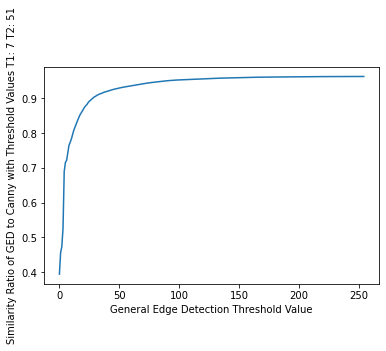

Done


In [16]:
totalp = img.shape[0] * img.shape[1]

print("Calculating Similarity")
similarity = compare_general_canny(T1, T2)
print("Plotting Similarity")
plt.plot(list(range(0,255)),similarity)
plt.xlabel("General Edge Detection Threshold Value")
plt.ylabel("Similarity Ratio of GED to Canny with Threshold Values T1: " + str(T1) + " T2: " + str(T2))
plt.show()
print("Done")

## Spiral Staircase Image

Text(0.5, 1.0, 'General Edge Detection With T = 18')

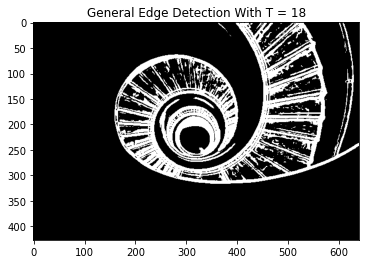

In [8]:
plt.imshow(resGED, cmap = 'gray')
plt.title("General Edge Detection With T = " + str(T))

Text(0.5, 1.0, 'Canny Edge Detection with T1 = 7 T2 = 51')

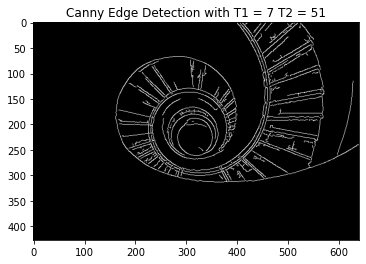

In [9]:
plt.imshow(resC, cmap = 'gray')
plt.title("Canny Edge Detection with T1 = " + str(T1) + " T2 = " + str(T2))

## Lines Image

Text(0.5, 1.0, 'General Edge Detection With T = 18')

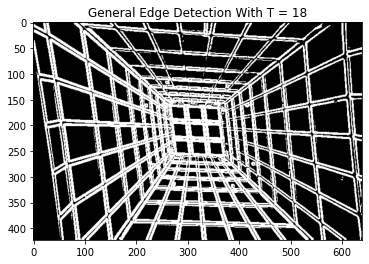

In [11]:
plt.imshow(resGED, cmap = 'gray')
plt.title("General Edge Detection With T = " + str(T))

Text(0.5, 1.0, 'Canny Edge Detection with T1 = 7 T2 = 51')

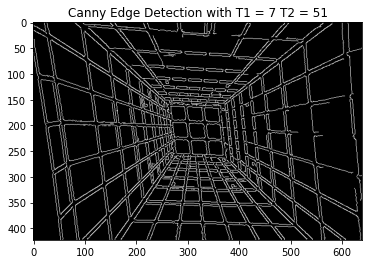

In [12]:
plt.imshow(resC, cmap = 'gray')
plt.title("Canny Edge Detection with T1 = " + str(T1) + " T2 = " + str(T2))

## Fence Image

Text(0.5, 1.0, 'General Edge Detection With T = 18')

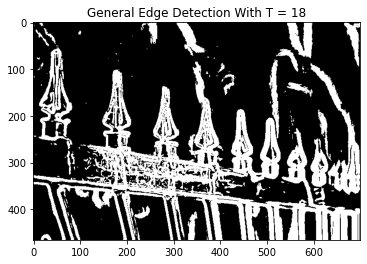

In [18]:
plt.imshow(resGED, cmap = 'gray')
plt.title("General Edge Detection With T = " + str(T))

Text(0.5, 1.0, 'Canny Edge Detection with T1 = 7 T2 = 51')

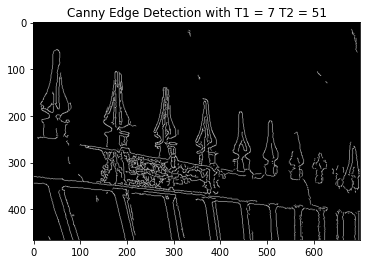

In [19]:
plt.imshow(resC, cmap = 'gray')
plt.title("Canny Edge Detection with T1 = " + str(T1) + " T2 = " + str(T2))